## What's the difference between Plotly and Dash?
**Relationship:**

- Plotly provides the foundation for creating interactive charts, which are then embedded as components within Dash applications.
- Dash builds upon Plotly's strengths by adding user interactivity, layout capabilities, and deployment options for creating full-fledged web applications.

**In essence:**

- Use Plotly for static or embedded visualizations within reports or presentations.
- Use Dash for building interactive dashboards and web apps that allow users to actively explore and analyze data.

**Plotly**

* **Function:** A powerful Python graphing library that allows you to create a wide variety of interactive charts and visualizations.
* **Key Features:**
    - Extensive chart types: Line, scatter, bar, pie, histograms, 3D plots, geographic visualizations, and more.
    - Customization capabilities: Fine-tune plot appearance, interactivity, and layout using a rich API.
    - Offline and online usage: Create static charts for reports or embed them in web applications using frameworks like Dash.
* **Use Case:** Ideal for generating high-quality, interactive visualizations for presentations, reports, or exploration.

**Dash**

* **Function:** A framework for building analytical web applications in Python, often used in conjunction with Plotly for data visualization.
* **Key Features:**
    - Declarative approach: Build UIs by composing components and defining their properties.
    - Interactive elements: Create dashboards with user input controls like sliders, dropdowns, and date pickers to explore data.
    - Reusable components: Organize UI elements into reusable components for modularity.
    - Deployment options: Standalone server or integration with Flask applications.
* **Use Case:** Perfect for creating interactive dashboards and web applications that allow users to filter, analyze, and explore data.


<font color = red><b>With Dash you don't make visualizations, you build an interface to display Plotly's visualizations.</b></font>

## Creating Mapbox Token

<font color = "#ff5733" size="12"><b>FAQ's about Mapbox Tokens</b></font>

* **What are Mapbox tokens?** Think of them as keys that allow you to access Mapbox's online map services. These services provide the base imagery for your maps in Plotly.py.
* **When do you need a token?** You only need one if your base map data comes from Mapbox (identified by `layout.mapbox.style`). Don't worry if you're using a different service like Stadia Maps (explained later).
* **How to get a token:** Sign up for a free Mapbox account at [https://www.mapbox.com/](https://www.mapbox.com/) and grab your unique access token.
* **Setting the token:** There are two ways:
    - In Plotly.py, use `layout.mapbox.access_token` for more granular control.
    - For a simpler approach with Plotly Express, use `px.set_mapbox_access_token()` before creating your map.


<font color="#16a085" size="6"><b>Here are the steps to create and load a Mapbox token for use in your Python Dash code:</b></font>

**1. Create a Mapbox Account and Token:**

- Visit the Mapbox website ([https://www.mapbox.com/](https://www.mapbox.com/)) and create a free account.
- Once logged in, navigate to your account dashboard (usually found at [https://account.mapbox.com/](https://account.mapbox.com/)).
- Click the "**+ Create a token**" button.
- Choose a name for your token, select the **"Default public"** scopes, and create the token.
- Carefully copy the **public token** string that appears.

<img src="https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/433815426_328656166860978_6481244414977586578_n.png?_nc_cat=102&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeFpJAscI1hdJ8vvBPMIg_w3YyHA_NV05cNjIcD81XTlw9V4m7Dt2nJFLUeSZEKBFBE&_nc_ohc=Qvz9UVuWXA0AX81B7oj&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdRphqtUyFNDBLHdmS5JeCLwymcVTlJ9HL1J2rxFfO7dTQ&oe=66250A8D">

**2. Install Required Libraries:**

- If you haven't already, install the necessary libraries using pip:

  ```bash
  pip install dash mapboxgl
  ```

In [1]:
!pip install dash mapboxgl

**3. Load the Token in Python:**

- In your Python Dash code, import the mapboxgl library and load your token:

  ```python
  import mapboxgl

  mapboxgl.access_token = 'YOUR_MAPBOX_PUBLIC_TOKEN'  # Replace with your actual token
  ```

In [2]:
#mapbox_token = 'pk.eyJ1IjoicmlhZmxvcmEiLCJhIjoiY2x1Mm4yOTM0MHVkbTJrczM3Mzh3Ym5pcSJ9.IqM4fmtD9tw8D2_J36hLbg'
mapbox_token = 'pk.eyJ1IjoiY2hhcmxlc281NSIsImEiOiJjbHUzZXRybDIxMDk2MnZxc3F0dDBseGxmIn0.Mu5eHcBOktApMQOI74wwJg'

In [3]:
import mapboxgl
mapboxgl.access_token = mapbox_token  # Replace with your actual token

**4. Use the Token in Dash Components:**

- Access the token within Dash components using `mapboxgl.access_token`.


**Key Points:**

- Store your Mapbox token securely and never share it publicly.
- Mapbox offers various styles you can customize for your map.
- Explore Mapbox documentation for more advanced features and customization options.
- Refer to Dash documentation for examples and guidelines on integrating Mapbox maps within your Dash app.


## Difference between tile-based maps and outline-based maps, using Plotly as an example

### Tile-Based Maps (Mapbox Maps)

* **Concept:** Imagine a giant image of the Earth cut into smaller, square pieces (tiles). These tiles are pre-rendered at different zoom levels, containing geographical data and visuals.
* **Strengths:**
    - **Scalability:** Zooming in and out is smooth because you're just swapping out tiles for higher or lower detail levels.
    - **Offline Capability:** Tiles can be downloaded for offline use in mobile apps or situations without internet access.
    - **Customization:** Mapbox offers various map styles (e.g., streets, satellite, terrain) that you can choose from.
* **Weaknesses:**
    - **Larger File Size:** Requires downloading more data compared to outline-based maps, especially for high zoom levels.
    - **Limited Customization:** You're limited to the pre-defined styles offered by the provider.

**Example (using Plotly's `px.scatter_mapbox`):**

```python
# Import necessary libraries
import plotly.express as px
import pandas as pd

# Load the 'carshare' dataset from Plotly
df = px.data.carshare()

# Display the first five rows of the data
print(df.head())

# Create the scatter plot
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", hover_name="car_hours", color="peak_hour", size="car_hours",
                        zoom=10, center=dict(lat=45.5, lon=-73.6), mapbox_style="carto-positron")

# Customize the layout
fig.update_layout(title="Car Share Data on Mapbox Map", mapbox=dict(accesstoken='your_mapbox_token'))

# Display the plot
fig.show()
```
<img src="https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/434044840_699975295406183_3494657923244591173_n.png?_nc_cat=106&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeFJckMyz0V46OkbDWAJvXJgd6MmliKmM4x3oyaWIqYzjL7x65Lm2yCM19gd49CBTY4&_nc_ohc=a-cdwAF5_gkAX_fnpVk&_nc_oc=AdhrjimqgdA2AvqX1BHhJcDkDfhDVs_JXY30AGoRiBvyePoG_Xig5Wo7tPPxO9My-FPLO_al9ZaOZP8F75ZZEevU&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdR-SfsK3eg7wdX57GSobmWFKeDIVootYadpFcoVh5ViwQ&oe=6624D339">


In [4]:
#run the code here
# import plotly.express as px
# import pandas as pd

# # Load the 'carshare' dataset from Plotly
# df = px.data.carshare()

# # Display the first five rows of the data
# print(df.head())

# # Create the scatter plot
# fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", hover_name="car_hours", color="peak_hour", size="car_hours",
#                         zoom=10, center=dict(lat=45.5, lon=-73.6), mapbox_style="carto-positron")

# # Customize the layout
# fig.update_layout(title="Car Share Data on Mapbox Map", mapbox=dict(accesstoken='your_mapbox_token'))

# # Display the plot
# fig.show()

### Alternate example for Tile-Based Maps

```python
import plotly.express as px
import geopandas as gpd

geo_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

px.set_mapbox_access_token(mapbox_token) #mapbox_token was our assigned variable to the token string
fig = px.scatter_mapbox(geo_df,
                        lat=geo_df.geometry.y,
                        lon=geo_df.geometry.x,
                        hover_name="name",
                        zoom=1)
fig.show()
```
<img src='https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/434075092_456382603405727_2667831361594418318_n.png?_nc_cat=100&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeFtMkgUMn_IQq1cIYOVgHqXjiu5VOjR8LWOK7lU6NHwtfBse6OdHdKgAiCME4wtKqg&_nc_ohc=zxIBxHB0UsMAX9pHpri&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdTWfRK_VFanMMqx_cYB370vHl2I3Ju1zv3ZPg2iV33UCQ&oe=6624E5DD'>

In [5]:
# #run the code here
# import plotly.express as px
# import geopandas as gpd

# geo_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# px.set_mapbox_access_token(mapbox_token) #mapbox_token was our assigned variable to the token string
# fig = px.scatter_mapbox(geo_df,
#                         lat=geo_df.geometry.y,
#                         lon=geo_df.geometry.x,
#                         hover_name="name",
#                         zoom=1)
# fig.show()

### Outline-Based Maps (Geo Maps)
* **Concept:** These maps store geographical features (countries, borders, etc.) as vector outlines (lines and shapes). They are typically rendered on the fly based on the zoom level and user interaction.
* **Strengths:**
    - **Smaller File Size:** More efficient for data transfer and faster loading times.
    - **Greater Customization:** You have more control over the map appearance, including colors, line styles, and adding custom overlays.
* **Weaknesses:**
    - **Less Scalable:** Zooming in too far might reveal rough edges or lack of detail due to limited pre-rendered data.
    - **Limited Offline Use:** Not typically designed for offline use as they require rendering on the fly.

**Example (using Plotly's `px.scatter_geo`):**

```python
import plotly.express as px
  
  
df = px.data.gapminder().query("year == 2007")
  
plot = px.scatter_geo(df, locations="iso_alpha",
                      size="gdpPercap",
                      color = "country")
plot.show()
```

<img src="https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/433659941_1944061992721876_6836137390863995347_n.png?_nc_cat=109&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeF2h0H2gB1JAfBO0KYtE53afxssHgQTLC9_GyweBBMsLx9bbjKQAK_ehDkg9JrXYSs&_nc_ohc=pxOBCW-R0xkAX-_RzBh&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdSz0BDD-P05X4_yxZt7ZTPqcEqkfU6R_R9trnIguPq-hA&oe=6624F779">
<img src="https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/434044995_740411068275663_197788570668108603_n.png?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeHLau8ycfRovFijXNU1AbCJSRhS-VSsyxdJGFL5VKzLF03vbv9OYuBBftmquKhnwJ4&_nc_ohc=T329tKOAPwwAX_FWMly&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdRYuPMfNTXH0CJcw1C7Kj0gMAKVT4XE0tZRFE-py-78IA&oe=6624FCF0">

In [6]:
# #run the code here
# import plotly.express as px
  
  
# df = px.data.gapminder().query("year == 2007")
  
# plot = px.scatter_geo(df, locations="iso_alpha",
#                       size="gdpPercap",
#                       color = "country")
# plot.show()

## In class activity
### What are your observations?
Plotly has less map details than mapbox. <br> 
Zooming in and out of plotly doesn't reveal any terrain features or information. <br>
However Plotly allows the user to better select the data shown - we can toggle to remove/select items from the available countries.

### What would be the notable differences?
The lag/latency of zooming in and out is more noticeable in Plotly. <br>
Mapbox can also struggle but only when zooming in.

<font color = "green ">Answer on this cell of the notebook.</font>

**Choosing the Right Map Type:**

- If interactivity, smooth zooming, and offline usage are essential, a tile-based map (like Mapbox) is a good choice.
- If file size is a concern, customization is more important, or offline use is not required, an outline-based map (like Geo maps) might be better.

**In Plotly:**

- The `layout.mapbox` object is used for configuring Mapbox maps (tile-based).
- The `layout.geo` object is used for configuring Geo maps (outline-based).
- The specific Plotly functions you use, like `px.scatter_mapbox` or `px.scatter_geo`, determine which object you'll work with.

## Mapbox Layers
For this discussion, we will focus on mapping using Mapbox
Read full documentations of [Mapbox for Python](https://plotly.com/python/mapbox-layers/)

<img src="https://www.imperialsugar.com/sites/default/files/styles/recipe_image_node_full/public/recipe/Red-Berry-Cheesecake-Layer-Cake-imperial.jpg?itok=zKZNVsl9" height ="350">

**Imagine Mapbox tiles like a layered cake:**

- The bottom layer (`layout.mapbox.style`) is the foundation, also called the "base map." This layer provides the background imagery, like streets, satellite views, or terrain.
- On top of this base map, you can add your own data points or visualizations (`data`). These elements appear by default above the base map.
- Finally, you have an extra layer toolkit (`layout.mapbox.layers`). This allows you to add even more visual elements on top of everything else, giving you more control over the final map's appearance. Just like with the data layer, you can control where these additional layers appear.


##Choosing Your Map Style

The `layout.mapbox.style` property in Mapbox lets you customize the base map for your visualization. Here's a breakdown of your options:

- **Blank Canvas:** `"white-bg"` provides a clean white background for complete control over map elements. No external data requests are needed.

<img src ="https://i.stack.imgur.com/DltQW.jpg" height = "350">

- **Public Tile Servers:** Styles like `"open-street-map"`, `"carto-positron"`, or `"carto-darkmatter"` use publicly available raster tiles. No signup or tokens are required.

<i>Example of OpenStreetMap base map styles</i>

<img src="https://www.esri.com/arcgis-blog/wp-content/uploads/2021/07/OpenStreetMap.jpg" height = "350">

- **Mapbox Vector Tiles (Requires Token):** Styles like `"basic"`, `"streets"`, `"outdoors"`, `"light"`, `"dark"`, `"satellite"`, or `"satellite-streets"`, etc., leverage Mapbox's vector tiles. You'll need a Mapbox Access Token or a local Mapbox installation.

<img src="https://assets-global.website-files.com/5f2a93fe880654a977c51043/6372672687d6b7f0d8eafdea_Screen%20Shot%202022-11-14%20at%207.34.04%20AM.png" height = "350">

- **Stadia Maps (Requires Account):** Styles like `"stamen-terrain"`, `"stamen-toner"`, or `"stamen-watercolor"` use Stadia Maps raster tiles. Create a Stadia Maps account and obtain a token for these.

<img src="https://pbs.twimg.com/media/GGIueoSW8AAZ2N9.jpg" height = "550">

- **Custom Mapbox Service Styles:** You can use a custom Mapbox service style URL or even create a custom Mapbox Style object (refer to the documentation for details). Both require a Mapbox Access Token or on-premise installation.
  - Read more on these sites:
    - [Creating custom Mapbox style](https://docs.mapbox.com/help/tutorials/create-a-custom-style/)
    - [Mapbox Studio style editor Tutorial](https://docs.mapbox.com/studio-manual/reference/styles/)


### Examples of different maps

#### Free and Accessible Base Maps with OpenStreetMap
**OpenStreetMap (OSM) to the Rescue:** When you need a base map for your visualization and don't want to deal with access tokens, OpenStreetMap (OSM) comes in handy. It's a collaborative project that provides free, editable maps of the world.

<img src="https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/433978916_926631648963252_6450040452010645957_n.png?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeEupd5ftTqM_ItKTxz6OIBNRkzqskoi16tGTOqySiLXq6XHeV78wj7XYYzLfAcpaxc&_nc_ohc=9XnshK6oDrIAX_eb2kJ&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdS0F5l-SFxYFg2Q8-LQI7f8IR8_5oUDtfS7VIWjXQFTtg&oe=6624FDE6" height = "250">

**Key Points:**

- OpenStreetMap offers a great alternative for base maps without requiring tokens or paid services.
- The provided code demonstrates a simple example using Plotly Express and the "open-street-map" style.
- You can explore further customization options within Plotly for these maps.

**Additional Considerations:**

- While free and convenient, OpenStreetMap tiles might not offer the same level of detail or customization compared to some paid tile providers.
- Consider the trade-off between ease of use and advanced features when choosing your base map source.

```python
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
```
- **Code Breakdown:**
  - The provided code imports necessary libraries: pandas for data manipulation and Plotly Express for creating the map.
  - It loads a CSV dataset of major US cities with latitude, longitude, city names, and other details.
  - The `px.scatter_mapbox` function creates a scatter map using the city data, specifying latitude, longitude, hover text, and color.
  - Importantly, `fig.update_layout(mapbox_style="open-street-map")` sets the base map style to "open-street-map," which utilizes OpenStreetMap tiles.
  - The following line adjusts margins for a cleaner layout.
  - Finally, `fig.show()` displays the map in your notebook.

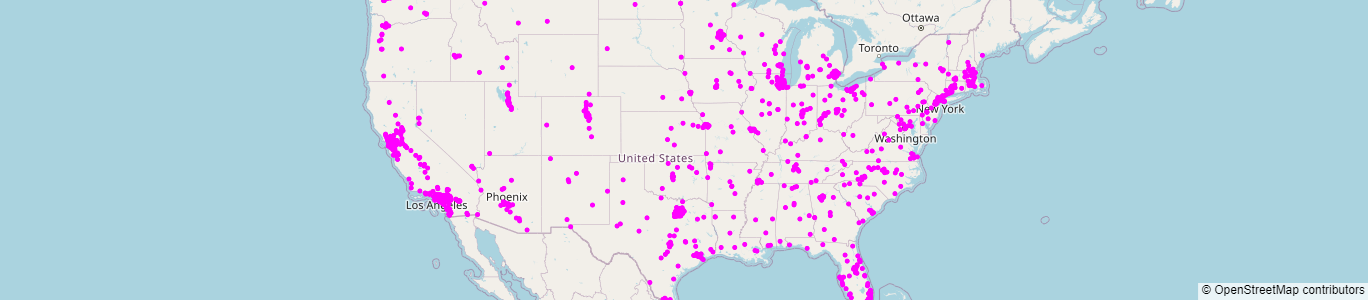

In [7]:
# #run the code here
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Leveraging Public Imagery from USGS for Base Maps

This section explores another option for free base maps: leveraging public imagery from the United States Geological Survey (USGS).

**Why Use USGS Imagery?**

- **Free and Accessible:** Similar to OpenStreetMap, USGS imagery provides a freely available base map option, eliminating the need for access tokens or paid services.
- **Specific Imagery:** USGS imagery might offer specific details or styles relevant to your project, depending on the available datasets.

<img src = "https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/433826460_438726731924562_8007098085234694593_n.png?_nc_cat=100&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeEPlNJqw_x_xtg6TduI6zpmi8MU6xeFyqCLwxTrF4XKoJvPxfgVkp1A-YnFmBYCs1I&_nc_ohc=IyWhU6M9dLQAX8idnTD&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdTiGtlTEaWHOzvNgAKasPVXlQaWiNdh5u4xzZywWTMtjw&oe=66251B8D" height = "250">

**Key Points:**

- USGS imagery offers an additional free and potentially thematic base map option.
- The code demonstrates how to integrate USGS imagery using `layout.mapbox.layers`.
- Remember to explore available USGS datasets and imagery styles for your specific needs.

**Additional Considerations:**

- Compared to some pre-defined styles, USGS imagery might require more customization for aesthetics.
- Consider the data type and visual style of USGS imagery for a good fit with your visualization.

```python
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
```
**Code Breakdown:**

- The provided code imports libraries and loads city data, similar to the previous example.
- `fig.update_layout(mapbox_style="white-bg")` sets the base to a blank canvas.
- The key part lies in `fig.update_layout(mapbox_layers=[...])`:
    - An array containing a single layer definition is used.
    - This layer utilizes `"sourcetype": "raster"` to specify raster tiles (image-based map).
    - The `source` property defines the URL for USGS imagery tiles, including placeholders for zoom level (`{z}`), tile y coordinate (`{y}`), and tile x coordinate (`{x}`).
    - `"below": 'traces"` ensures data points are rendered on top of the tile layer.
    - `"sourceattribution": "United States Geological Survey"` is a good practice to acknowledge the source of the imagery.

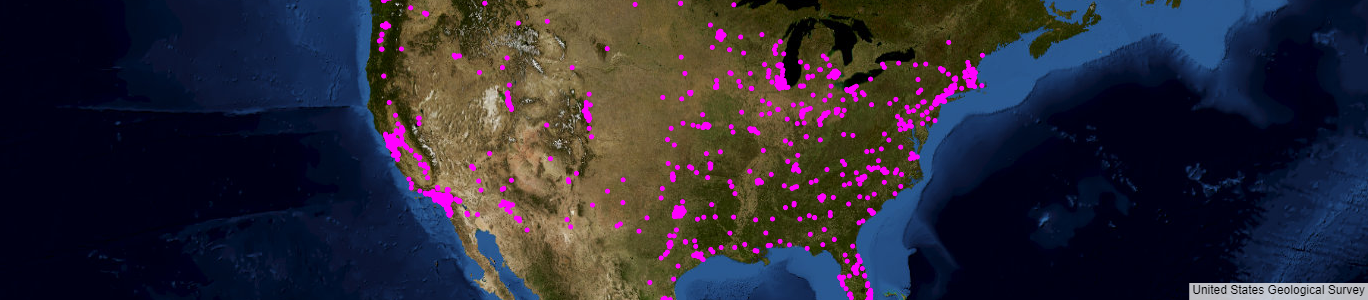

In [8]:
#run code here
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Enhancing Your Map with Overlays: USGS Base and Environment Canada Radar

This example builds upon the previous one, demonstrating how to incorporate an additional layer on top of your base map. Here, we'll overlay near-real-time radar imagery from Environment Canada.

**Why Add an Overlay?**

- **Additional Information:** Overlays allow you to display extra data sets on your map, providing more context or insights. In this case, the radar overlay visualizes real-time weather patterns.
- **Customization:** Overlays offer flexibility to tailor your map to specific needs.

**Key Points:**

- This example showcases layering multiple sources on a map using `layout.mapbox.layers`.
- The provided code demonstrates how to integrate a WMS layer from Environment Canada for real-time radar data.
- Explore WMS services and other data sources to find relevant overlays for your visualizations.

**Additional Considerations:**

- WMS services might have specific usage terms or limitations. Refer to the data provider's documentation.
- Ensure proper attribution for all data sources used in your map.
- Consider visual clarity and potential information overload when adding multiple layers.


```python
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
        {
            "sourcetype": "raster",
            "sourceattribution": "Government of Canada",
            "source": ["https://geo.weather.gc.ca/geomet/?"
                       "SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX={bbox-epsg-3857}&CRS=EPSG:3857"
                       "&WIDTH=1000&HEIGHT=1000&LAYERS=RADAR_1KM_RDBR&TILED=true&FORMAT=image/png"],
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
```

**Code Breakdown:**

- The code structure is similar to the past examples, importing libraries and loading city data.
- The key change lies in `fig.update_layout(mapbox_layers=[...])`:
    - The layer definition array now includes two elements.
    - The first layer remains the same, defining the USGS imagery base map.
    - The second layer definition focuses on the radar overlay:
        - `"sourcetype": "raster"` indicates another raster tile source.
        - `"sourceattribution": "Government of Canada"` acknowledges the data source.
        - The `source` property constructs a complex URL for the Environment Canada WMS service (Web Map Service) to retrieve radar data. This URL includes placeholders for bounding box and other parameters.
        - Unlike the base layer, this one omits `"below: 'traces'"` as radar data is typically meant to be displayed on top of other map elements.

In [9]:
#run the code here
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
        {
            "sourcetype": "raster",
            "sourceattribution": "Government of Canada",
            "source": ["https://geo.weather.gc.ca/geomet/?"
                       "SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX={bbox-epsg-3857}&CRS=EPSG:3857"
                       "&WIDTH=1000&HEIGHT=1000&LAYERS=RADAR_1KM_RDBR&TILED=true&FORMAT=image/png"],
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

##### In class activity
### What are your observations?
Openstreetmap has less details than USGS's satellite imagery. <br>
However it does have outlines of each state and country.

### What would be the notable differences between the two (in terms of the code and the output)?
Setting the style is different <br> 
* fig.update_layout(mapbox_style="open-street-map")<br>
* fig.update_layout(mapbox_style= ["source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"] ...)<br>
Based from the 3rd sample code, we can add as many styles as we want to overlay it, though javascript is unable to show it as of testing.

  

<font color = "green ">Answer on this cell of the notebook.</font>

#### Unveiling the Dark Side: Mapbox Styles with Access Tokens

This section explores using styles from the Mapbox service, which offer a wider range of aesthetics and customization options compared to free public tile servers. However, these styles require a Mapbox Access Token.

**Why Use Mapbox Styles?**

- **Variety and Customization:** Mapbox provides a vast library of pre-defined styles like "dark," "streets," or "outdoors," offering diverse visual options for your map. You can even create custom styles.
- **Advanced Features:** Mapbox styles often include additional features like traffic data or building outlines, enriching your map's content.

<img src = "https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/433927376_1065325514757307_3452744608154120429_n.png?_nc_cat=111&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeEn6ouDGs0eHDk50LY0KE3OvmaVgbEehha-ZpWBsR6GFsnHaZUCIjSjFrd2K9-lsGQ&_nc_ohc=23k8w4O2LhIAX8gKlmQ&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdS-9he1_TuRtEzne9mU_tFc-uoKd6d6yWEBk10_4SQeeA&oe=6624F23F" height =250>

**Key Points:**

- Mapbox styles offer a premium option for base maps with a wider range of aesthetics and features.
- A free Mapbox account provides a limited access token, while paid plans offer more features.
- The code demonstrates how to integrate Mapbox styles with your Plotly map, requiring a valid access token.

**Additional Considerations:**

- Explore the vast collection of Mapbox styles to find one that suits your project's visual needs.
- Consider the trade-off between free public tile servers and the advanced features of Mapbox styles.
- Always adhere to Mapbox's terms of service when using their access tokens.


```python
token = open(".mapbox_token").read() # you will need your own token

import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
```

**Code Breakdown:**

- The code first retrieves a Mapbox Access Token, likely stored in a separate file (`.mapbox_token`). You'll need your own token for this to work.
- The rest of the code structure resembles previous examples, loading city data and creating a scatter map with Plotly Express.
- The crucial part is `fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)`.
    - `"mapbox_style: 'dark'"` sets the base map style to the "dark" theme from Mapbox.
    - `"mapbox_accesstoken=token"` provides your Mapbox Access Token for authentication.

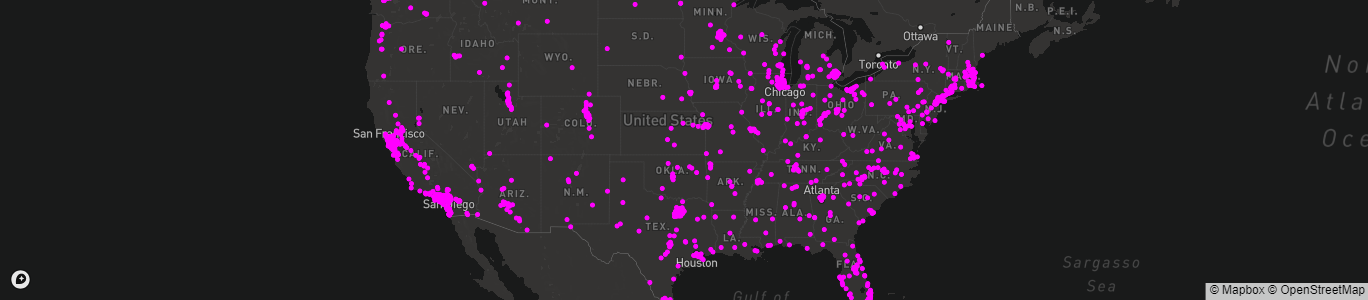

In [15]:
#run the code here
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="dark", mapbox_accesstoken=mapbox_token)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Using a mapbox image layer to display a datashader raster image
**Why Use Datashader and Mapbox Together?**

- **Datashader for Large Datasets:** Datashader excels at handling massive datasets like taxi ride records. It efficiently creates rasterized images (grids of colored pixels) summarizing the data's spatial distribution.
- **Mapbox for Context:** Mapbox provides a base map, allowing you to visualize the taxi data density on a geographical context of New York City streets.
- **No Token Needed:** This approach utilizes the "carto-darkmatter" style, which is publicly available from Mapbox, eliminating the need for an access token.

<img src="https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/433975778_431101856142014_2283965283043625167_n.png?_nc_cat=110&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeHVdT7riGDAGGns5-fvTwEXvS186iupJue9LXzqK6km55c_4oi96jQyy8WYcQirq5U&_nc_ohc=HTYfbI-65c4AX8EVxHb&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdQAago1877hOQ8Qldxaj2llj-GKmmjgficpdYyBtGFY8Q&oe=6624F6E2" height=350>

**Visualizing NYC Taxi Data Density with Datashader and Mapbox (No Token Needed!)**

This example demonstrates how to combine the power of Datashader and Mapbox to create a compelling data visualization. We'll explore the spatial distribution of taxi rides in New York City.

**Key Points:**

- This example showcases a powerful technique for visualizing large spatial datasets using Datashader and Mapbox.
- The code demonstrates how to leverage Datashader's rasterization capabilities and Mapbox's base maps effectively.
- Explore different colormaps and data aggregation methods within Datashader to customize the visualization.


```python
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/uber-rides-data1.csv')
dff = df.query('Lat < 40.82').query('Lat > 40.70').query('Lon > -74.02').query('Lon < -73.91')

import datashader as ds
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(dff, x='Lon', y='Lat')
# agg is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = agg.coords['Lat'].values, agg.coords['Lon'].values
# Corners of the image, which need to be passed to mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]

from colorcet import fire
import datashader.transfer_functions as tf
img = tf.shade(agg, cmap=fire)[::-1].to_pil()

import plotly.express as px
# Trick to create rapidly a figure with mapbox axes
fig = px.scatter_mapbox(dff[:1], lat='Lat', lon='Lon', zoom=12)
# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-darkmatter",
                 mapbox_layers = [
                {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                }]
)
fig.show()
```

**Code Breakdown:**

1. **Data Preparation:**
   - The code starts by loading the taxi ride data from a CSV file.
   - It then filters the data to focus on a specific area of New York City.

2. **Datashader Processing:**
   - Datashader objects are introduced:
     - `cvs`: A canvas object defines the dimensions of the final image.
     - `agg`: This object aggregates the taxi ride data points onto a grid within the canvas.
   - The code retrieves the corner coordinates of the grid for later use with Mapbox.

3. **Color Mapping and Image Creation:**
   - The `colorcet.fire` colormap is used to visually represent the density of taxi rides (higher density = brighter colors).
   - Datashader's transfer functions are used to apply the colormap to the aggregated data (`agg`). The image is then flipped vertically and converted to a PIL image object (`img`).

4. **Creating the Map with Plotly Express:**
   - A trick is used to create a base map with Plotly Express (`px.scatter_mapbox`) using just one data point (any point will do here). This provides the map axes and layout.
   - The key part lies in `fig.update_layout`:
     - The map style is set to `"carto-darkmatter"` (publicly available).
     - A new layer is defined within `mapbox_layers`:
       - `"sourcetype": "image"` specifies that we're adding an image layer.
       - `"source"` references the PIL image object (`img`) containing the Datashader visualization.
       - `"coordinates"` provide the corner coordinates of the image grid, ensuring proper alignment with the map.

5. **Displaying the Result:**
   - Finally, `fig.show()` displays the final visualization, combining the taxi ride density heatmap with the Mapbox base map.


In [16]:
!pip install datashader

   ---------------------------------------- 0.0/18.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/18.3 MB 2.6 MB/s eta 0:00:07
   ---------------------------------------- 0.2/18.3 MB 2.8 MB/s eta 0:00:07
    --------------------------------------- 0.4/18.3 MB 2.8 MB/s eta 0:00:07
   - -------------------------------------- 0.5/18.3 MB 2.9 MB/s eta 0:00:07
   - -------------------------------------- 0.6/18.3 MB 2.9 MB/s eta 0:00:07
   - -------------------------------------- 0.8/18.3 MB 2.9 MB/s eta 0:00:07
   -- ------------------------------------- 0.9/18.3 MB 3.0 MB/s eta 0:00:06
   -- ------------------------------------- 1.1/18.3 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/18.3 MB 3.2 MB/s eta 0:00:06
   --- ------------------------------------ 1.5/18.3 MB 3.3 MB/s eta 0:00:06
   --- ------------------------------------ 1.7/18.3 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.9/18.3 MB 3.4 MB/s eta 0:00:05
   ---

In [19]:
#run code here
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/uber-rides-data1.csv')
dff = df.query('Lat < 40.82').query('Lat > 40.70').query('Lon > -74.02').query('Lon < -73.91')

import datashader as ds
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(dff, x='Lon', y='Lat')
# agg is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = agg.coords['Lat'].values, agg.coords['Lon'].values
# Corners of the image, which need to be passed to mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]

from colorcet import fire
import datashader.transfer_functions as tf
img = tf.shade(agg, cmap=fire)[::-1].to_pil()

import plotly.express as px
# Trick to create rapidly a figure with mapbox axes
fig = px.scatter_mapbox(dff[:1], lat='Lat', lon='Lon', zoom=12)
# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-darkmatter",
                 mapbox_layers = [
                {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                }]
)
fig.show()

C:\Users\cmath\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




ImportError: Dask dataframe requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  python -m pip install "dask[dataframe]" --upgrade  # or python -m pip install

##### In class activity
What are your observations witht he different types of maps?

What would be the notable differences between the two (in terms of the code and the output)?

<font color = "green ">Answer on this cell of the notebook.</font>

## Keeping Users Within Boundaries: Map Bounds Control (New in v5.11)

<img src="https://scontent.fmnl31-1.fna.fbcdn.net/v/t1.15752-9/433760027_1139870733810596_4559563824074234283_n.png?_nc_cat=105&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeEp_5TGKUwIIszSC1hluga3y9mEG-4cmjnL2YQb7hyaOZpO8H-Z8HRDcb4SXKVKGQI&_nc_ohc=TRZnz3vqxKAAX8zmhhD&_nc_ht=scontent.fmnl31-1.fna&oh=03_AdQwvV78iEB0ZxG8v4Vyam0MDz6Mv516SBEOgGqbtCV5RQ&oe=66251F2B" height=250>

This section introduces a new feature in Plotly (version 5.11 and above): setting map bounds. This allows you to define a specific area for your map, restricting users from panning or zooming outside those limits while interacting with the visualization.

**Why Use Map Bounds?**

- **Focus on Specific Regions:** By setting bounds, you can ensure users stay focused on the relevant geographic area within your visualization. This is particularly helpful for maps displaying data concentrated in a specific region.
- **Improved User Experience:** Limiting panning and zooming can prevent users from losing context or seeing irrelevant data outside the intended area.

```python
import plotly.express as px
import pandas as pd

us_cities = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
)

fig = px.scatter_mapbox(
    us_cities,
    lat="lat",
    lon="lon",
    hover_name="City",
    hover_data=["State", "Population"],
    color_discrete_sequence=["fuchsia"],
    zoom=3,
    height=300,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90})
fig.show()
```

**Code Breakdown:**

- The code imports libraries and loads city data, similar to previous examples.
- The key addition lies in `fig.update_layout(mapbox_bounds={...})`:
    - A new dictionary named `mapbox_bounds` is used to define the boundaries.
    - Each key within the dictionary represents a cardinal direction:
        - `"west"`: Sets the minimum longitude value (-180 in this case).
        - `"east"`: Sets the maximum longitude value (-50 in this case).
        - `"south"`: Sets the minimum latitude value (20 in this case).
        - `"north"`: Sets the maximum latitude value (90 in this case).
    - By defining these values, you restrict the user's panning and zooming capabilities within this designated rectangle.

**Key Points:**

- Map bounds offer a way to control the visible area of your Plotly maps (introduced in v5.11).
- The provided code demonstrates how to set bounds using a dictionary with `"west"`, `"east"`, `"south"`, and `"north"` keys.
- Consider using map bounds when you want to focus users on a specific geographic region within your data visualization.


In [13]:
#run code here

# For further readings

**Official Documentation:**

* **Plotly Dash Mapbox Documentation:** [https://plotly.com/python/scattermapbox/](https://plotly.com/python/scattermapbox/)
    * This is the primary documentation for using Mapbox with Dash. It covers topics like setting map styles, adding custom layers, interacting with map elements, and more.
* **Mapbox GL JS Documentation:** [https://docs.mapbox.com/](https://docs.mapbox.com/)
    * While this documentation focuses on the Javascript library powering Mapbox maps, it provides valuable insights into the available styles, data formats, and functionalities relevant for using Mapbox with Dash.

**Tutorials and Examples:**

* **5 Awesome Tools to Power Your Geospatial Dash App:** [https://neptune.ai/blog/geospatial-data-science-logging-interactive-charts-in-neptune-with-plotly](https://neptune.ai/blog/geospatial-data-science-logging-interactive-charts-in-neptune-with-plotly)
    * This Medium article offers an overview of various tools for creating geospatial Dash apps, including Mapbox. It provides a high-level introduction and links to resources for further exploration.
* **Scatter Plot Mapbox (Checkbox) - Dash Python:** [https://m.youtube.com/watch?v=7R7VMSLwooo](https://m.youtube.com/watch?v=7R7VMSLwooo)
    * This Youtube tutorial demonstrates how to use a checkbox component to control map styles in a Dash app. It's a good example of interactive map elements.
* **Loading Mapbox Style object from local json file in dash app:** [https://plotly.com/python/mapbox-layers/](https://plotly.com/python/mapbox-layers/)
    * This Stack Overflow discussion addresses loading custom Mapbox styles from a local JSON file in a Dash app. While the question focuses on a specific aspect, it can be helpful if you plan to use custom styles.

**Additional Resources:**

* **Dash by Plotly:** [https://dash.plotly.com/](https://dash.plotly.com/)
    * The official Dash website provides a wealth of resources, including tutorials, examples, and a gallery showcasing various Dash applications. Explore the "Gallery" section for inspiration on using maps in Dash.
* **Datashader with Mapbox for Large Spatial Datasets:**

    * While not directly related to Dash, this explanation demonstrates how to combine Datashader for efficient data visualization with Mapbox for geographical context. This technique can be adapted for use within Dash apps.

[https://medium.com/tech-carnot/plotly-datashader-visualizing-large-geospatial-datasets-bea27b9d7824](https://medium.com/tech-carnot/plotly-datashader-visualizing-large-geospatial-datasets-bea27b9d7824)

[https://plotly.com/python/datashader/](https://plotly.com/python/datashader/)


Remember, these resources provide a starting point. As you delve deeper into mapping with Mapbox and Dash, you might discover additional documentation, tutorials, and community forums that cater to your specific needs and project requirements.

# In class activity (30 pts graded)
- Due date: **April 13, 2024**
- Code review this example: [Dash Natural Gas Well Production](https://github.com/plotly/dash-sample-apps/tree/main/apps/dash-oil-and-gas)
- Answer these guide questions and provide supporting artifacts to each of your statement
  1. What does this code snippet achieve?
  2. How does this contribute to the entirety of the code?
  3. Can you explain the logic behind each step?
  4. How would you modify this code to achieve a different outcome (provide your own paramter on how you wish to change the outcome)?
  5. Are there any potential errors or inefficiencies in the code? How would you improve it?
- Assignment of code snippets:
    * Group A: lines 20-39, 480-541
    * Group B: lines 63-79, 322-350
    * Group C: lines 50-60, 544-601
    * Group D: lines 42-47, 437-477
- Submit your code reviews in PDF format



